
### Comment Volume Prediction using Neural Networks and Decision Trees



In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Load Data

In [2]:
import os
cur_dir = os.path.realpath('.')
data_dir = os.path.join(cur_dir,'Dataset')
train_dir = os.path.join(data_dir,'Training')
test_dir = os.path.join(data_dir,'Testing', 'TestSet')

In [3]:
list_train = []
list_test = []
# Obtain train files
for x in os.listdir(train_dir):
    if(x.endswith(".csv")):
        list_train.append(os.path.join(train_dir, x))

for x in os.listdir(test_dir):
    if(x.endswith(".csv")):
        list_test.append(os.path.join(test_dir, x))

list_train = sorted(list_train)
list_test = sorted(list_test)

In [4]:
columns = ["Page Popularity/likes", "Page Checkinsâ€™s", "Page talking about",
           "Page Category", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "CC1", "CC2", "CC3", "CC4", "CC5", "Base time",
           "Post length", "Post Share Count", "Post Promotion Status", "H Local",
           "Post Sunday", "Post Monday", "Post Tuesday", "Post Wednesday", "Post Thursday", "Post Friday", "Post Saturday",
           "Base Sunday", "Base Monday", "Base Tuesday", "Base Wednesday", "Base Thursday", "Base Friday", "Base Saturday",
           "Target Variable"]
print(len(columns), columns)

54 ['Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about', 'Page Category', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time', 'Post length', 'Post Share Count', 'Post Promotion Status', 'H Local', 'Post Sunday', 'Post Monday', 'Post Tuesday', 'Post Wednesday', 'Post Thursday', 'Post Friday', 'Post Saturday', 'Base Sunday', 'Base Monday', 'Base Tuesday', 'Base Wednesday', 'Base Thursday', 'Base Friday', 'Base Saturday', 'Target Variable']


In [5]:
import pandas
trainData = pandas.read_csv(list_train[4], names=columns)
testData = pandas.read_csv(list_test[1], names=columns)
print("Number of Training data:", len(trainData))
print("Number of Testing data:", len(testData))
trainData.head()

Number of Training data: 199030
Number of Testing data: 100


,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


# Explore data

<IPython.core.display.Javascript object>


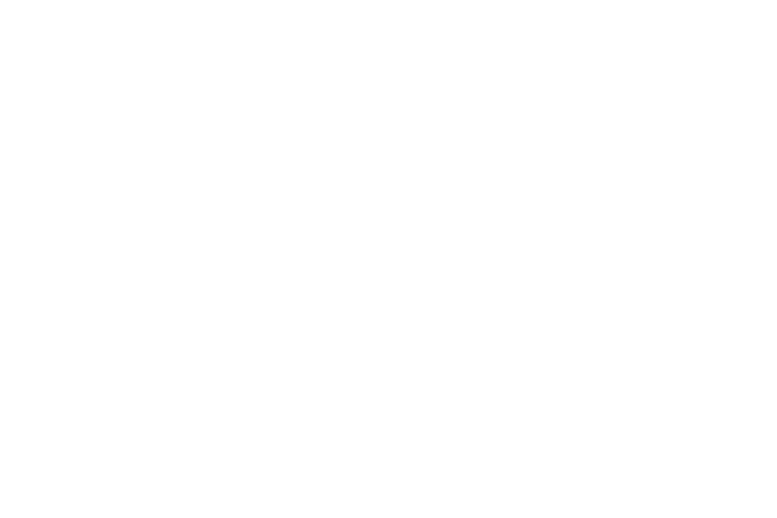

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f87400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16b9acc50>]], dtype=object)

<IPython.core.display.Javascript object>


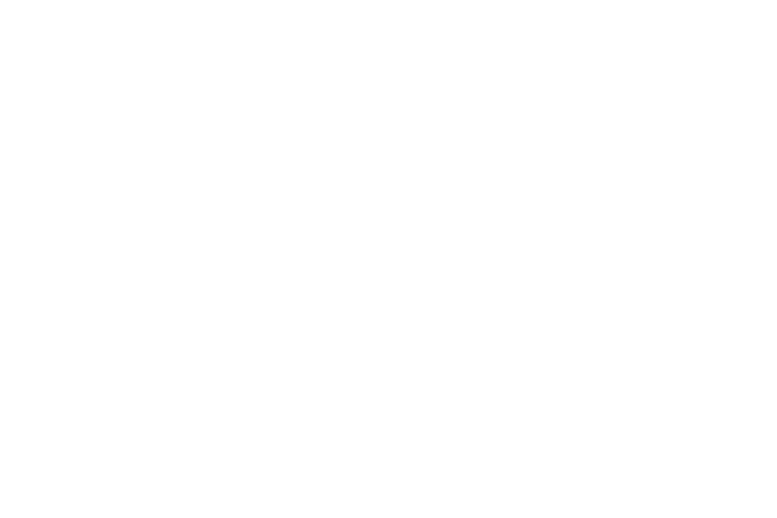

In [22]:
%matplotlib notebook

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(testData.loc[:5000, 'Derived':'CC5'])

### check correlation between features

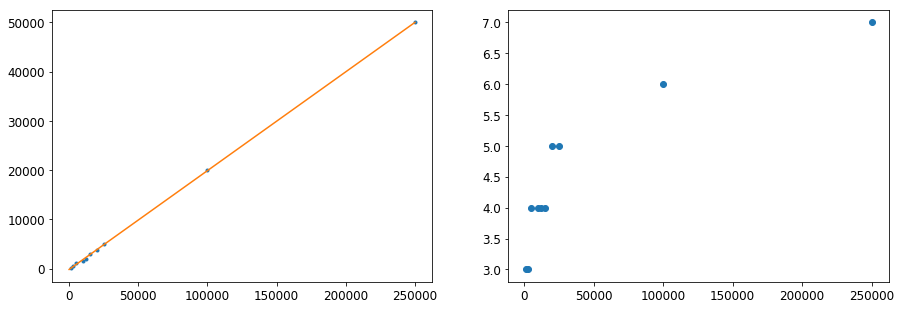

In [7]:
%matplotlib inline
X, Y = 0, 1

import numpy as np
from scipy.stats import linregress

fig, (ax, ax2) = plt.subplots(1, 2, figsize=[15,5])
data = np.array([[25000,1000,10000,12000,20005, 5000, 3000, 15000, 250000, 100000], [5000,95,1500,1900,3700, 1200, 600, 3000, 50000, 20000]])

ax.plot(data[X], data[Y], '.')

m, b, R, p, SEm = linregress(data[X], data[Y])
x2 = np.array([0, data[X].max()])
ax.plot(x2, m * x2 + b)

data[Y] = data[X]**(1/6)
chart = ax2.plot(data[X], data[Y], 'o')

In [8]:
import numpy as np
corrData=trainData.corr('pearson')
corrData

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
Page Popularity/likes,1.000000,0.045090,0.622700,-0.042003,0.046600,0.157902,0.165026,0.147022,0.173462,0.046528,...,-0.009949,0.002727,-0.003590,-0.001345,0.002757,0.007740,0.001449,-0.001514,-0.005663,0.064537
Page Checkinsâ€™s,0.045090,1.000000,0.167326,-0.060345,-0.007382,0.158831,0.151055,0.129424,0.169037,-0.006570,...,-0.006156,0.008358,0.000764,0.000087,0.000197,-0.001587,0.002071,-0.001521,-0.000045,0.035152
Page talking about,0.622700,0.167326,1.000000,-0.148164,0.118685,0.484869,0.515621,0.457754,0.539581,0.119260,...,-0.027714,-0.007980,-0.014358,-0.006598,0.004262,0.023153,0.022747,-0.009419,-0.021087,0.194768
Page Category,-0.042003,-0.060345,-0.148164,1.000000,-0.026591,-0.319812,-0.233917,-0.193385,-0.291309,-0.023868,...,0.002795,-0.002126,0.002386,-0.004504,-0.003690,-0.001920,-0.001325,0.003916,0.005049,-0.069001
Derived,0.046600,-0.007382,0.118685,-0.026591,1.000000,0.072641,0.335366,0.409813,0.130532,0.930690,...,-0.003884,-0.005278,-0.000426,-0.006805,0.001074,0.002660,-0.000129,0.006651,-0.003232,0.138996
Derived.1,0.157902,0.158831,0.484869,-0.319812,0.072641,1.000000,0.715212,0.582076,0.896815,0.079879,...,-0.010944,-0.009929,-0.005159,-0.005468,0.001918,0.011149,0.007315,-0.001381,-0.008924,0.238743
Derived.2,0.165026,0.151055,0.515621,-0.233917,0.335366,0.715212,1.000000,0.963216,0.903036,0.340154,...,-0.017454,-0.004056,-0.008361,-0.005993,0.003581,0.012472,0.009093,-0.003123,-0.008304,0.359536
Derived.3,0.147022,0.129424,0.457754,-0.193385,0.409813,0.582076,0.963216,1.000000,0.773769,0.412988,...,-0.015895,-0.001976,-0.007473,-0.005297,0.003135,0.010544,0.008291,-0.002518,-0.007247,0.349452
Derived.4,0.173462,0.169037,0.539581,-0.291309,0.130532,0.896815,0.903036,0.773769,1.000000,0.146383,...,-0.016705,-0.009671,-0.009642,-0.006710,0.003410,0.014783,0.011331,-0.003686,-0.010263,0.316593
Derived.5,0.046528,-0.006570,0.119260,-0.023868,0.930690,0.079879,0.340154,0.412988,0.146383,1.000000,...,-0.004534,-0.003742,-0.002532,-0.005779,0.001494,0.003371,0.003135,0.003903,-0.003902,0.153853


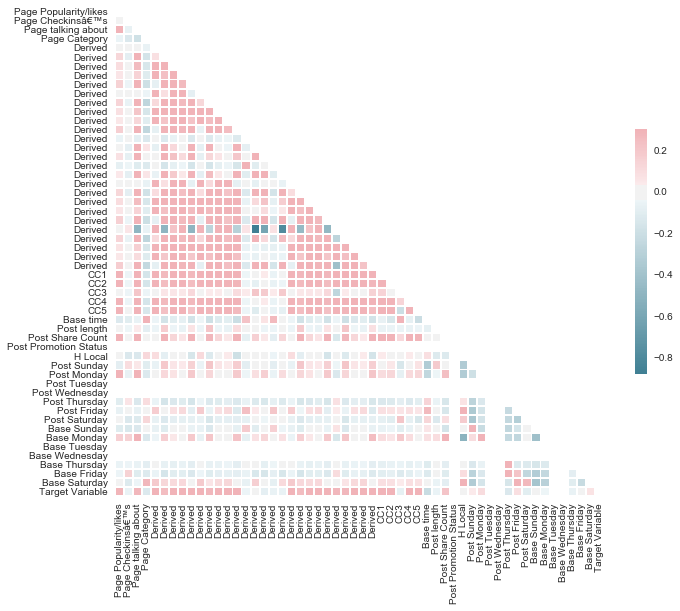

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

corr = testData.corr()
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5},
            yticklabels=columns,xticklabels=columns)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [10]:
corrDataAbs = corrData.abs()
np.fill_diagonal(corrDataAbs.values, np.NaN)
upper_matrix = np.triu(np.ones(corrDataAbs.shape)).astype(np.bool)

upperTriangleCorr = corrDataAbs.where(upper_matrix)
upperTriangleCorr

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
Page Popularity/likes,NaN,0.04509,0.622700,0.042003,0.046600,0.157902,0.165026,0.147022,0.173462,0.046528,...,0.009949,0.002727,0.003590,0.001345,0.002757,0.007740,0.001449,0.001514,0.005663,0.064537
Page Checkinsâ€™s,NaN,NaN,0.167326,0.060345,0.007382,0.158831,0.151055,0.129424,0.169037,0.006570,...,0.006156,0.008358,0.000764,0.000087,0.000197,0.001587,0.002071,0.001521,0.000045,0.035152
Page talking about,NaN,NaN,NaN,0.148164,0.118685,0.484869,0.515621,0.457754,0.539581,0.119260,...,0.027714,0.007980,0.014358,0.006598,0.004262,0.023153,0.022747,0.009419,0.021087,0.194768
Page Category,NaN,NaN,NaN,NaN,0.026591,0.319812,0.233917,0.193385,0.291309,0.023868,...,0.002795,0.002126,0.002386,0.004504,0.003690,0.001920,0.001325,0.003916,0.005049,0.069001
Derived,NaN,NaN,NaN,NaN,NaN,0.072641,0.335366,0.409813,0.130532,0.930690,...,0.003884,0.005278,0.000426,0.006805,0.001074,0.002660,0.000129,0.006651,0.003232,0.138996
Derived.1,NaN,NaN,NaN,NaN,NaN,NaN,0.715212,0.582076,0.896815,0.079879,...,0.010944,0.009929,0.005159,0.005468,0.001918,0.011149,0.007315,0.001381,0.008924,0.238743
Derived.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963216,0.903036,0.340154,...,0.017454,0.004056,0.008361,0.005993,0.003581,0.012472,0.009093,0.003123,0.008304,0.359536
Derived.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773769,0.412988,...,0.015895,0.001976,0.007473,0.005297,0.003135,0.010544,0.008291,0.002518,0.007247,0.349452
Derived.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146383,...,0.016705,0.009671,0.009642,0.006710,0.003410,0.014783,0.011331,0.003686,0.010263,0.316593
Derived.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004534,0.003742,0.002532,0.005779,0.001494,0.003371,0.003135,0.003903,0.003902,0.153853


In [11]:
upperTriangleCorr = upperTriangleCorr.where(upperTriangleCorr>0.95)
strongCorrData = upperTriangleCorr.dropna(how='all', axis=(0,1))
b = strongCorrData[strongCorrData.notnull()].stack().index
for c in b:
    print(c, corrData[c[1]][c[0]])
columnsRemove = list(map(lambda x: x[1], b))

('Derived', 'Derived.15') 0.999830712749
('Derived.1', 'Derived.6') 0.968434639652
('Derived.1', 'Derived.11') 0.96780381851
('Derived.1', 'Derived.16') 0.993783500124
('Derived.1', 'Derived.21') 0.959629922118
('Derived.2', 'Derived.3') 0.963215780774
('Derived.2', 'Derived.7') 0.983718262825
('Derived.2', 'Derived.12') 0.991463268195
('Derived.2', 'Derived.17') 0.999367190265
('Derived.2', 'Derived.18') 0.964908039337
('Derived.2', 'Derived.24') 0.96224784044
('Derived.3', 'Derived.12') 0.955776303102
('Derived.3', 'Derived.17') 0.960293395747
('Derived.3', 'Derived.18') 0.997833442999
('Derived.4', 'Derived.9') 0.973749708348
('Derived.4', 'Derived.14') 0.981743632745
('Derived.4', 'Derived.19') 0.998057004017
('Derived.4', 'Derived.24') 0.967300818605
('Derived.6', 'Derived.16') 0.978002904034
('Derived.6', 'Derived.21') 0.998145498564
('Derived.7', 'Derived.12') 0.965884786594
('Derived.7', 'Derived.17') 0.983235892906
('Derived.7', 'Derived.18') 0.950895995354
('Derived.7', 'Deri

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


y_test, x_test = testData.loc[:, 'Target Variable'], testData.drop('Target Variable', 1)
Y, X = trainData.loc[:, 'Target Variable'], trainData.drop('Target Variable', 1)

regressor = DecisionTreeRegressor()

regressor.fit(X, Y)
y = regressor.predict(x_test)
raw = ('Raw decision tree', regressor.score(x_test, y_test))
score = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error', cv=10)
print(regressor.score(X, Y), regressor.score(x_test, y_test))

0.999999600651 0.615479285175


In [13]:
filteredData = trainData.drop(columnsRemove, 1)
filteredTest = testData.drop(columnsRemove, 1)
YY, XX = filteredData.loc[:, 'Target Variable'], filteredData.drop('Target Variable', 1)
y_test, x_test = filteredTest.loc[:, 'Target Variable'], filteredTest.drop('Target Variable', 1)

regressor = DecisionTreeRegressor()

filteredScore = cross_val_score(regressor, XX, YY, scoring='neg_mean_squared_error')
regressor.fit(XX,YY)
yy = regressor.predict(x_test)
pearson = ('Pearson decision tree', regressor.score(x_test, y_test))
print(regressor.score(XX, YY), regressor.score(x_test, y_test))

0.999999600651 0.626525385939


### Normalize


In [14]:
from sklearn.preprocessing import Normalizer

XXX, YYY = Normalizer().fit_transform(trainData.drop('Target Variable', 1)), trainData.loc[:, 'Target Variable']
y_test, x_test = testData.loc[:, 'Target Variable'], testData.drop('Target Variable', 1)
regressor = DecisionTreeRegressor()

normalizedScore = cross_val_score(regressor, XXX, YYY, scoring='neg_mean_squared_error')
regressor.fit(XXX, YYY)
yyy = regressor.predict(x_test)
normalized = ('Normalized decision tree', regressor.score(x_test, y_test))
print(regressor.score(XXX, YYY), regressor.score(x_test, y_test))

0.99999865887 -0.935336608112


In [15]:
main_score = "Score: {} +- {}".format(score.mean(), score.std())
main_filtered = "Score: {} +- {}".format(filteredScore.mean(), filteredScore.std())
main_normalized = "Score: {} +- {}".format(normalizedScore.mean(), normalizedScore.std())

main_score, main_filtered, main_normalized

('Score: -957.6458448475105 +- 399.0366159645181',
 'Score: -871.4749151625557 +- 123.89319050953121',
 'Score: -1156.574175344362 +- 249.11570311548397')

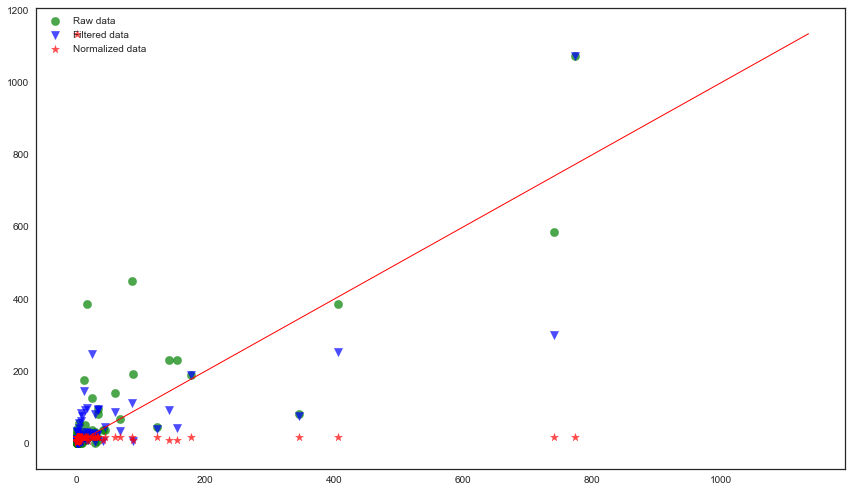

In [16]:
max_value = max(y_test.max(), y.max(), yy.max(), yyy.max())
min_value = min(y_test.min(), y.min(), yy.min(), yyy.min())

plt.figure(figsize=[12, 7])
plt.scatter(y_test, y, c='green', marker='o', s=70, alpha=0.7, label='Raw data')
plt.scatter(y_test, yy, c='blue', marker='v', s=70, alpha=0.7, label='Filtered data')
plt.scatter(y_test, yyy, c='red', marker='*', s=70, alpha=0.7, label='Normalized data')
plt.legend(loc='upper left')
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

# Prepare Data

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train = trainData.iloc[:, :-1].values
y_train = trainData.iloc[:, -1].values

X_test = testData.iloc[:, :-1].values
y_test = testData.iloc[:, -1].values

In [18]:
def plot_graphs(y_train, y_train_pred, y_test, y_test_pred):
    xy_min = 0
    xy_max = 1500

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    ax1.scatter(y_train, y_train_pred, c='blue', marker='o', s=50, alpha=0.7, label='Test with Trained Data')
    ax1.set_title('Prediction on Train set')
    ax1.set_xlim([xy_min, xy_max])
    ax1.set_ylim([xy_min, xy_max])
    ax1.plot([xy_min, xy_max], [xy_min, xy_max], color='red', linestyle='-', linewidth=2)

    ax2.scatter(y_test, y_test_pred, c='darkorange', marker='o', s=50, alpha=0.8, label='Test with Test Data')
    ax2.set_title('Prediction on Test set')
    ax2.set_xlim([xy_min, xy_max])
    ax2.set_ylim([xy_min, xy_max])
    ax2.plot([xy_min, xy_max], [xy_min, xy_max], color='red', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.scatter(y_train_pred, y_train - y_train_pred, c='black', marker='o', s=75, alpha=0.7, label='Training data')
    plt.scatter(y_test_pred, y_test - y_test_pred, c='lightgreen', marker='s', s=75, alpha=0.7, label='Test data')
    plt.xlabel('Predicted values', fontsize=18)
    plt.ylabel('Residuals', fontsize=18)
    plt.legend(loc='upper right')
    plt.plot([0, 1250],[0, 0], color='red', linestyle='-', linewidth=2)
    plt.xlim([-20, 1250])
    plt.ylim([-1000, 1500])
    plt.tight_layout()
    plt.show()

### Random Forest Regressor

Runnning Random Forest with 50 Trees...


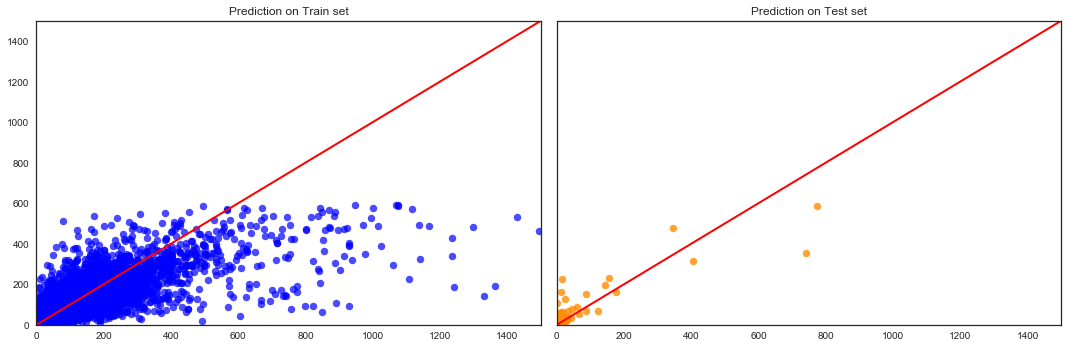

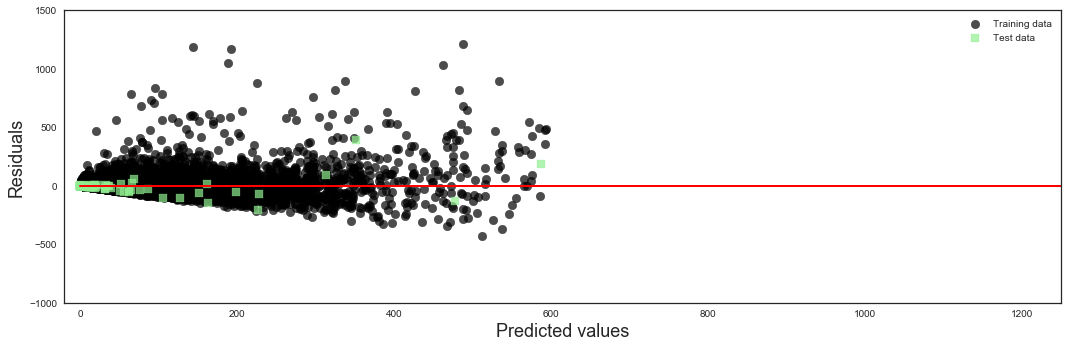

R² Score, on Training set: 0.719, on Testing set: 0.764
Mean Squared Error Score on Testing set: 3344.84
CPU times: user 3min 55s, sys: 735 ms, total: 3min 56s
Wall time: 1min 12s


In [19]:
%%time
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, y_train, X_test, y_test):
    n_trees = 50
    print("Runnning Random Forest with",n_trees,"Trees...")

    regressor = RandomForestRegressor(n_estimators=n_trees, min_samples_leaf=30, max_depth= 35, max_features= 46, n_jobs=-1)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)   

    plot_graphs(y_train, y_train_pred, y_test, y_test_pred)

    print("R² Score, on Training set: %.3f, on Testing set: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("Mean Squared Error Score on Testing set: %.2f" % (mean_squared_error(y_test, y_test_pred)))
    return ('Random forest best params', regressor.score(X_test, y_test))
random_forest = random_forest_regressor(X_train, y_train, X_test, y_test)

### Use Tensorflow for MLP

In [27]:
import tensorflow as tf
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNRegressor(hidden_units=[300,100], 
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x114fa70f0>, '_master': '', '_environment': 'local', '_save_checkpoints_secs': 600, '_task_id': 0, '_session_config': None, '_tf_random_seed': 42, '_log_step_count_steps': 100, '_model_dir': '/var/folders/kv/yw_qk07d3zbgswxrv10rxcw80000gn/T/tmp4l5h4gx0', '_is_chief': True, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_type': None, '_num_ps_replicas': 0, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/kv/yw_qk07d3zbgswxrv10rxcw80000gn/T/tmp4l5h4gx0/model.ckpt.
INFO:tensorflow:loss = 3.21222e+09, step = 1
INFO:tensorflow:global_step/sec: 283.388
INFO:tensorflow:loss = 1.08097e+07, step = 101 (0.355 sec)
INFO:tensorflo

SKCompat()

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

y_pred = dnn_clf.predict(X_test)
# accuracy_score(y_test, y_pred1)

INFO:tensorflow:Restoring parameters from /var/folders/kv/yw_qk07d3zbgswxrv10rxcw80000gn/T/tmp4l5h4gx0/model.ckpt-40000


In [72]:
y_test

array([  0,   3,   8,   0, 741,   0, 406,   0,   0,  59,   0,   4,   0,
         0,   2,  32,   0,   1,  88,  67,   0,   0,   1, 124,   0,   3,
        15,   8,   0,   7,   5,   3,  31,  12,   2,   0,   9,   0,   2,
        13,   0,   0,   0,   1,   0,   0,   2,  18,   1,   4,   0,   1,
       177,   5, 144, 773,  86,  33,   1,   2,   0,   1,   0,   1,  14,
       156,   0,   0,   6,   7,   1,   2,  24,  16,  33,  26,   1,   0,
         1,  24,   7,  41,   0,   4, 345,   1,   4,   1,  28,  29,   1,
        17,   0,  44,   2,   0,   1,   0,   0,   5])

In [73]:
y_pred

{'scores': array([  1.34998306e+02,   2.32566719e+01,  -1.08699448e+02,
         -1.37247124e+01,   2.14467896e+03,  -3.69523163e+02,
          1.95007095e+02,   2.65041695e+01,   3.23341095e+02,
         -2.54486792e+03,   1.48299751e+01,   1.16105200e+03,
         -2.33488998e+02,   2.52245377e+02,   2.90930367e+01,
         -2.24008667e+03,  -6.73278656e+01,   3.32654572e+02,
          2.04320572e+02,   8.19598675e-01,   1.31861938e+03,
          9.13627197e+02,  -5.24136475e+02,  -3.54083667e+03,
         -5.44289360e+01,   5.54367867e+01,  -1.11347339e+03,
          5.88391304e+01,   6.91750641e+01,  -8.23131592e+02,
         -1.23647729e+03,   2.41091499e+01,  -8.58859711e+01,
         -1.93530991e+02,  -4.71620819e+02,  -5.09040337e+01,
         -1.04264633e+02,  -5.24122705e+03,   5.83645210e+01,
         -2.73907104e+03,  -1.18297534e+03,   1.04527603e+02,
          1.41537427e+03,   9.21608643e+02,  -4.94548149e+01,
          1.23904068e+02,  -1.24357104e+03,   9.13436768e+02